# Import Libaries

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banktransaction/banktransaction.csv


# Read Files

In [21]:
df=pd.read_csv("/kaggle/input/banktransaction/banktransaction.csv")


In [20]:
# Display the first few rows of the dataset
print(df.head())

  typeofaction  sourceid  destinationid  amountofmoney                 date  \
0      cash-in     30105          28942         494528  2019-07-19 14:40:00   
1      cash-in     30105           8692         494528  2019-05-17 14:57:00   
2      cash-in     30105          60094         494528  2019-07-20 13:20:00   
3      cash-in     30105          20575         494528  2019-07-03 14:15:00   
4      cash-in     30105          45938         494528  2019-05-26 10:40:00   

   isfraud typeoffraud  
0        1       type1  
1        1       type1  
2        1       type1  
3        1       type1  
4        1       type1  


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB
None


In [12]:
print(df.describe())

            sourceid  destinationid  amountofmoney      isfraud
count    2340.000000    2340.000000   2.340000e+03  2340.000000
mean    49111.255128   52257.918803   2.508583e+06     0.597863
std     29614.440603   28988.847246   2.560434e+06     0.490434
min        61.000000      53.000000   1.333200e+04     0.000000
25%     24033.000000   28046.000000   3.359140e+05     0.000000
50%     46632.500000   52748.500000   1.162354e+06     1.000000
75%     75107.000000   78030.000000   4.686559e+06     1.000000
max    100000.000000   99950.000000   7.952497e+06     1.000000


In [44]:
df['date'] = pd.to_datetime(df['date'])

# Viewing the Datatypes

In [45]:
print(df.dtypes)

typeofaction             object
sourceid                  int64
destinationid             int64
amountofmoney             int64
date             datetime64[ns]
isfraud                   int64
typeoffraud              object
dtype: object


# # Check for missing values

In [25]:
# Check for missing values
print(df.isnull().sum())

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64


# Transaction Patterns

# Distribution of transaction amounts

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


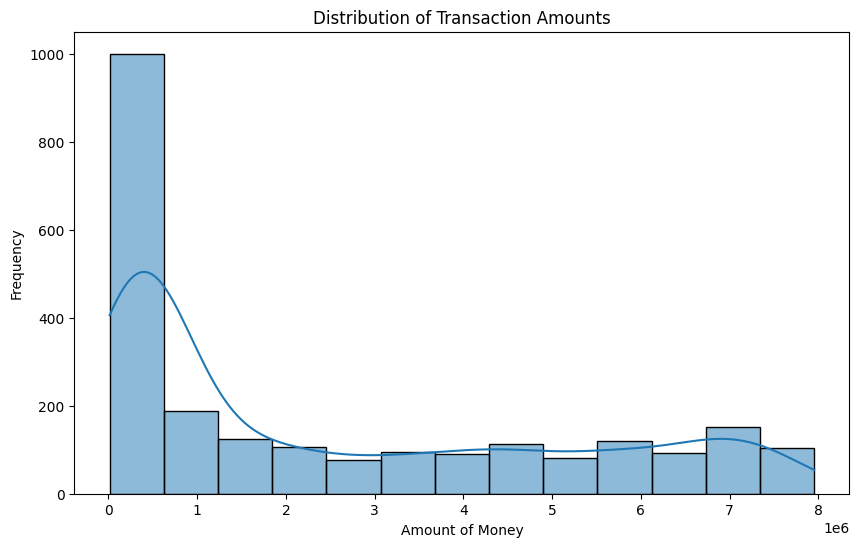

In [63]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amountofmoney'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount of Money')
plt.ylabel('Frequency')
plt.show()

**from the above histogram there is an outliar**

# Frequency of transactions over time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


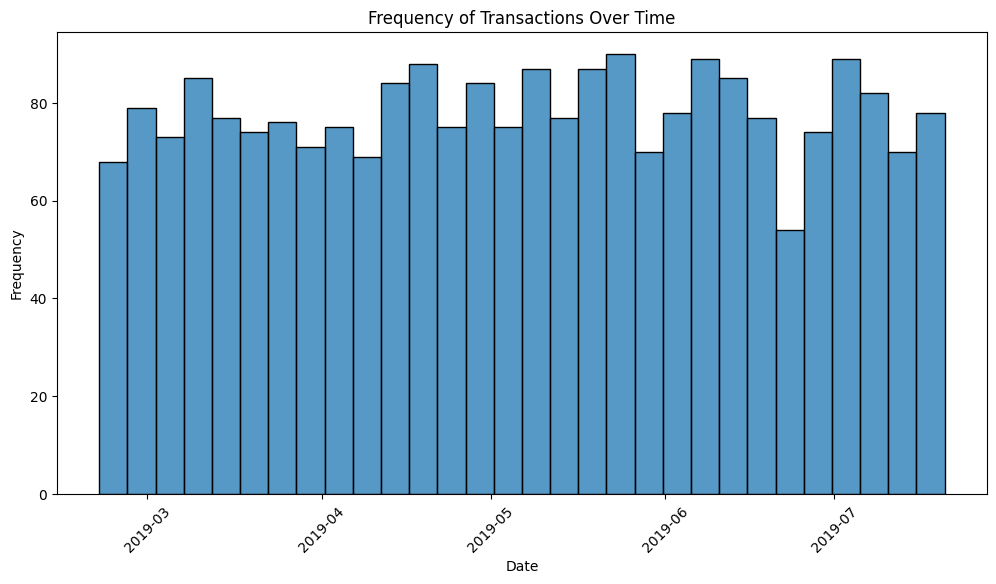

In [51]:
# Frequency of transactions over time
plt.figure(figsize=(12, 6))
sns.histplot(df['date'], bins=30, kde=False)
plt.title('Frequency of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [54]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['amountofmoney'].quantile(0.25)
Q3 = df['amountofmoney'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amountofmoney'] < lower_bound) | (df['amountofmoney'] > upper_bound)]

# Display the outliers
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [typeofaction, sourceid, destinationid, amountofmoney, date, isfraud, typeoffraud]
Index: []


4686559.25


# Fraud Detection

# Proportion of fraudulent transactions

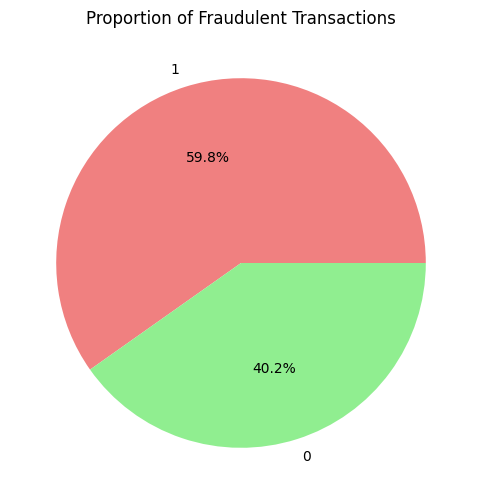

In [38]:
fraud_counts = df['isfraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Fraudulent Transactions')
plt.show()

# Distribution of fraudulent transactions across different source and destination IDs

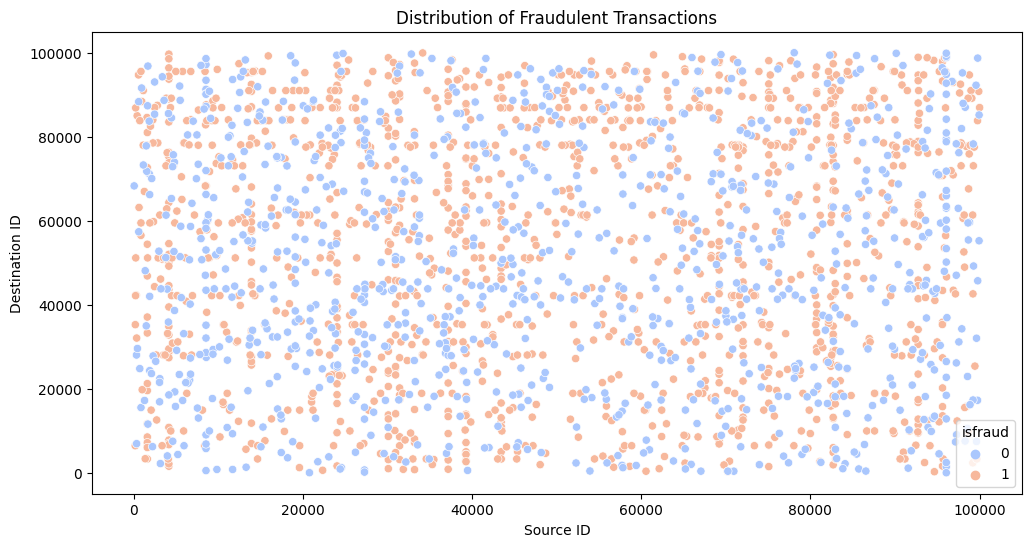

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sourceid', y='destinationid', hue='isfraud', data=df, palette='coolwarm')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Source ID')
plt.ylabel('Destination ID')
plt.show()

# Temporal Trends

In [58]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6


In [59]:

monthly_transaction_count = df.groupby(df['date'].dt.to_period('M')).size()


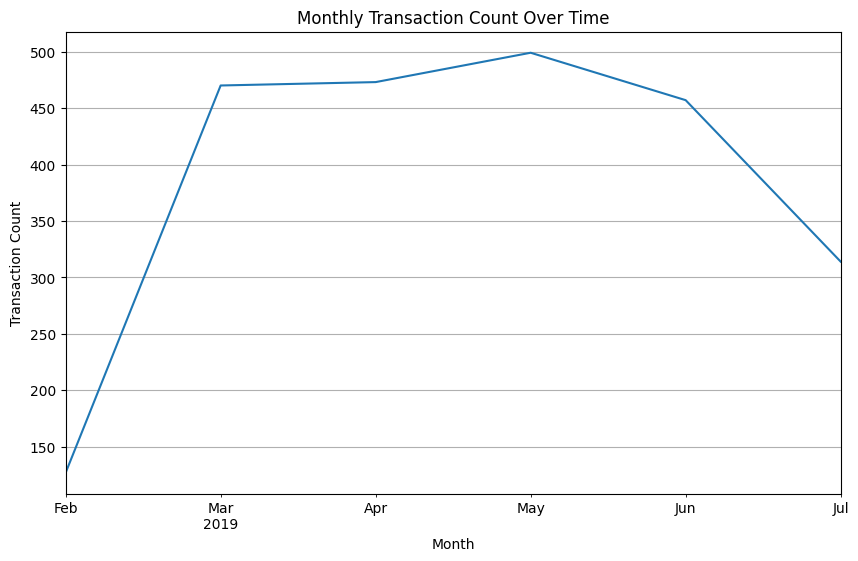

In [60]:
# Example: Plot monthly transaction count over time
plt.figure(figsize=(10, 6))
monthly_transaction_count.plot(kind='line')
plt.title('Monthly Transaction Count Over Time')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
